In [3]:
import numpy as np
import time
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
#Hard-coded implementation
def butter_filter(data_shared, min_frq, max_frq, N):
    b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, output = 'ba', fs = 100)
    filtered = signal.filtfilt(b, a, data_shared)
    filtered_data = np.dstack([data_shared[0], filtered])[0]

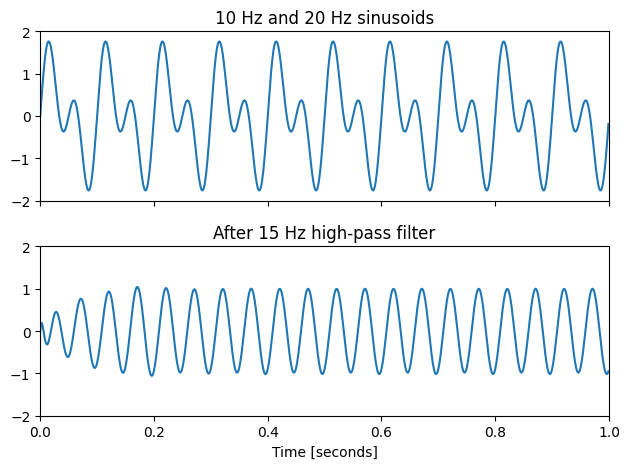

In [ ]:
#ButterWorth Filter example, signal between 10 and 20 Hz
t = np.linspace(0, 1, 1000, False)
signalA = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) #Sampled at 1 kHz
ax1.plot(t, signalA)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

#def butterworth_bandpass(x, N):
sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, signalA)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()
signal.lfilter()

In [ ]:
%%time
#Local implementation with N = 4
#b, a = signal.butter(N, [0.01, 0.99], 'band', analog = False)
#In our case, frq ranges from 0.5-5Hz

def butter_bandpass(signalB, min_frq, max_frq, N):
    b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, fs = 100)
    filtered = signal.lfilter(b, a, signalB)
    #plt.plot(t, filtered)
    #plt.show()
    return filtered

for i in range(1000):
    signalB = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
    filt = butter_bandpass(signalB, 0.5, 5, 4)
    del filt, signalB

CPU times: total: 141 ms
Wall time: 190 ms


In [ ]:
i = 0
times = []
while i < 10:
    start = time.time() * 1000
    
    butter_bandpass(0.01, 0.99, 4)

    time.sleep(1)
    end = time.time() * 1000
    elapsed_time = end - start
    times.append(elapsed_time)
    print(f"Elapsed time:  {elapsed_time}")
    i += 1

avg_time = np.mean(times) - 1000
print("Avg elapsed time in ms:", avg_time)

Elapsed time:  1001.100341796875
Elapsed time:  1001.148193359375
Elapsed time:  1000.972412109375
Elapsed time:  1001.604736328125
Elapsed time:  1002.25341796875
Elapsed time:  1001.46142578125
Elapsed time:  1001.715576171875
Elapsed time:  1001.33349609375
Elapsed time:  1001.09619140625
Elapsed time:  1001.156005859375
Avg elapsed time in ms: 1.3841796875000227


In [ ]:
#Hard-coded implementation function
#Min freq should be 100Hz, max should be 4kHz
#Wn should be between 0 and 1? [min_frq, max_frq]
#Set warning for high polynomial order?

def butter_bandpass(data_shared, min_frq, max_frq, N):
    data = data_shared[i + 1]
    b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, fs = 100)
    filtered = signal.lfilter(b, a, data)
    filtered_data = np.dstack([data_shared[0], filtered])[0]
